In [1]:
#Importing the necessary modules and libraries
import numpy as np
import pandas as pd
#Matplot and Seaborn for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm, skew
import statsmodels.api as sm

In [2]:
#Read train dataset
cab_train=pd.read_csv('train.csv')
#Code to retreive the top 5 rows of the train dataset
cab_train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [112]:
#Read the test dataset
cab_test=pd.read_csv('test.csv')
#Code to retreive the top 5 rows of the test dataset
cab_test.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689459,9.44,A,10.0,2.57438,A,B,3.68000,2,NaN,46,63,Male
1,T0005689462,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,49,80,Female
2,T0005689463,10.38,C,4.0,2.70530,A,D,4.50500,0,NaN,47,74,Male
3,T0005689466,14.94,NaN,6.0,2.48159,C,E,4.53000,0,63.0,43,54,Male
4,T0005689468,32.03,B,7.0,2.81598,A,K,4.60125,3,96.0,44,56,Male


In [4]:
#Get the number of rows and columns of the train dataset
print('Train dataset contain {} rwos and {} columns'.format(cab_train.shape[0],cab_train.shape[1]))

Train dataset contain 131662 rwos and 14 columns


In [5]:
#Get the number of rows and columns of the test dataset
print('Test dataset contain {} rwos and {} columns'.format(cab_test.shape[0],cab_test.shape[1]))

Test dataset contain 87395 rwos and 13 columns


In [6]:
cab_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
Trip_ID                        131662 non-null object
Trip_Distance                  131662 non-null float64
Type_of_Cab                    111452 non-null object
Customer_Since_Months          125742 non-null float64
Life_Style_Index               111469 non-null float64
Confidence_Life_Style_Index    111469 non-null object
Destination_Type               131662 non-null object
Customer_Rating                131662 non-null float64
Cancellation_Last_1Month       131662 non-null int64
Var1                           60632 non-null float64
Var2                           131662 non-null int64
Var3                           131662 non-null int64
Gender                         131662 non-null object
Surge_Pricing_Type             131662 non-null int64
dtypes: float64(5), int64(4), object(5)
memory usage: 14.1+ MB


In [7]:
#Code to get the categorical columns of the dataset
cat_features=cab_train.select_dtypes(exclude='number').columns
cat_features

Index(['Trip_ID', 'Type_of_Cab', 'Confidence_Life_Style_Index',
       'Destination_Type', 'Gender'],
      dtype='object')

In [8]:
#Code to get the Numerical columns of the dataset
num_features=cab_train.select_dtypes(include='number').columns
num_features

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Surge_Pricing_Type'],
      dtype='object')

### Descriptive Statistics

In [9]:
cab_train.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


### Checking for missing values:

In [10]:
(cab_train.isnull().sum()/cab_train.shape[0])*100

Trip_ID                         0.000000
Trip_Distance                   0.000000
Type_of_Cab                    15.349911
Customer_Since_Months           4.496362
Life_Style_Index               15.336999
Confidence_Life_Style_Index    15.336999
Destination_Type                0.000000
Customer_Rating                 0.000000
Cancellation_Last_1Month        0.000000
Var1                           53.948748
Var2                            0.000000
Var3                            0.000000
Gender                          0.000000
Surge_Pricing_Type              0.000000
dtype: float64

Type_of_Cab, Customer_Since_Months, Life_Style_Index, Confidence_Life_Style_Index and Var1 columns have missing values.

In [11]:
def impute_missing(df,cols):
    for x in cols:
        mode = df[x].mode().values[0]
        df[x].fillna(mode, inplace=True)

    return df
    

In [12]:
#Code to get the categorical columns of the dataset
categorial_features = cab_train.select_dtypes(include=[np.object]).columns
print('Categorical Features in the train dataset are:')
categorial_features

Categorical Features in the train dataset are:


Index(['Trip_ID', 'Type_of_Cab', 'Confidence_Life_Style_Index',
       'Destination_Type', 'Gender'],
      dtype='object')

In [13]:
cab_train = impute_missing(cab_train,categorial_features)

In [14]:
(cab_train.isnull().sum()/cab_train.shape[0])*100

Trip_ID                         0.000000
Trip_Distance                   0.000000
Type_of_Cab                     0.000000
Customer_Since_Months           4.496362
Life_Style_Index               15.336999
Confidence_Life_Style_Index     0.000000
Destination_Type                0.000000
Customer_Rating                 0.000000
Cancellation_Last_1Month        0.000000
Var1                           53.948748
Var2                            0.000000
Var3                            0.000000
Gender                          0.000000
Surge_Pricing_Type              0.000000
dtype: float64

In [15]:
def impute_numerical_missing(df,cols):
    for x in cols:
        mean = df[x].mean()
        df[x].fillna(mean, inplace=True)

    return df
    

In [16]:
#Code to get the Numerical columns of the dataset
numerical_features = cab_train.select_dtypes(include=[np.number]).columns
print('Numerical Features in the train dataset are:')
numerical_features

Numerical Features in the train dataset are:


Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Surge_Pricing_Type'],
      dtype='object')

In [17]:
cab_train = impute_missing(cab_train,numerical_features)

In [18]:
(cab_train.isnull().sum()/cab_train.shape[0])*100

Trip_ID                        0.0
Trip_Distance                  0.0
Type_of_Cab                    0.0
Customer_Since_Months          0.0
Life_Style_Index               0.0
Confidence_Life_Style_Index    0.0
Destination_Type               0.0
Customer_Rating                0.0
Cancellation_Last_1Month       0.0
Var1                           0.0
Var2                           0.0
Var3                           0.0
Gender                         0.0
Surge_Pricing_Type             0.0
dtype: float64

There are no missing values.

In [19]:
cat_features=cab_test.select_dtypes(include='object').columns
num_features=cab_test.select_dtypes(include='number').columns
num_features

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3'],
      dtype='object')

In [20]:
(cab_test.isnull().sum()/cab_test.shape[0])*100

Trip_ID                         0.000000
Trip_Distance                   0.000000
Type_of_Cab                    15.055781
Customer_Since_Months           4.538017
Life_Style_Index               15.249156
Confidence_Life_Style_Index    15.249156
Destination_Type                0.000000
Customer_Rating                 0.000000
Cancellation_Last_1Month        0.000000
Var1                           53.537388
Var2                            0.000000
Var3                            0.000000
Gender                          0.000000
dtype: float64

In [21]:
cab_test = impute_missing(cab_test,cat_features)
cab_test = impute_missing(cab_test,num_features)

In [22]:
(cab_test.isnull().sum()/cab_test.shape[0])*100

Trip_ID                        0.0
Trip_Distance                  0.0
Type_of_Cab                    0.0
Customer_Since_Months          0.0
Life_Style_Index               0.0
Confidence_Life_Style_Index    0.0
Destination_Type               0.0
Customer_Rating                0.0
Cancellation_Last_1Month       0.0
Var1                           0.0
Var2                           0.0
Var3                           0.0
Gender                         0.0
dtype: float64

# EDA

####  <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#0e92ea"> Univariate Analysis

In [23]:
cab_train

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,B,10.0,2.70697,B,E,3.50125,2,39.0,56,77,Male,2
3,T0005689465,61.56,C,10.0,2.70697,B,A,3.45375,0,39.0,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131657,T0005908509,11.72,D,1.0,2.74229,A,A,3.28500,0,61.0,47,76,Male,3
131658,T0005908510,74.81,C,7.0,2.81059,C,A,0.44500,0,39.0,63,88,Male,2
131659,T0005908512,40.17,C,10.0,2.99565,B,A,3.33625,0,39.0,48,75,Female,2
131660,T0005908513,46.88,B,4.0,3.04744,A,B,4.15750,1,47.0,54,79,Male,2


### Trip Distance 

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  """Entry point for launching an IPython kernel.


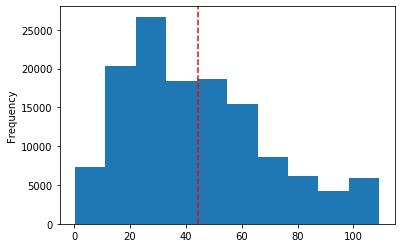

In [24]:
cab_train.Trip_Distance.plot("hist")
plt.axvline(x=cab_train.Trip_Distance.mean(),color='r', linestyle='--')

Most of the passengers travelled a distance between range 25-30 and the average distance travelled by a passenger is 44.2.

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  """Entry point for launching an IPython kernel.


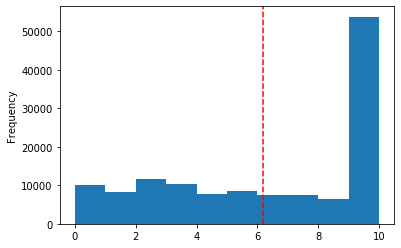

In [25]:
cab_train.Customer_Since_Months.plot("hist")
plt.axvline(x=cab_train.Customer_Since_Months.mean(),color='r', linestyle='--')

Most of the customers are using the cab services since last 10 months.

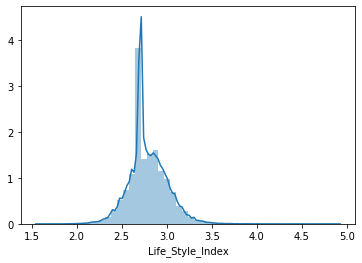

In [26]:
sns.distplot(cab_train['Life_Style_Index'])

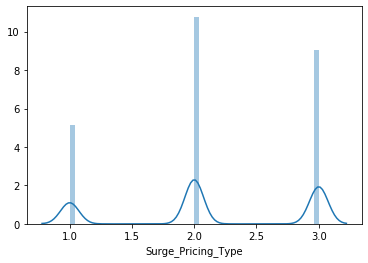

In [27]:
sns.distplot(cab_train['Surge_Pricing_Type'])

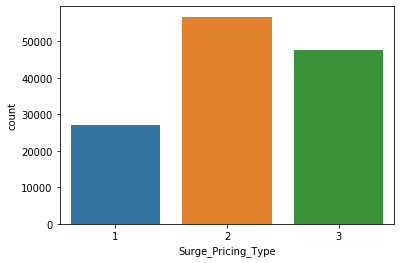

In [28]:
sns.countplot(cab_train.Surge_Pricing_Type)

####  <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#0e92ea"> Bivariate Analysis

Text(0.5, 1.0, 'Distribution of Surge Pricing Type Variable by Type of Cab')

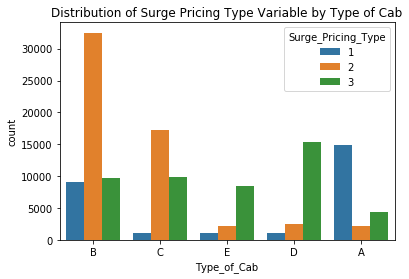

In [29]:
sns.countplot(x=cab_train.Type_of_Cab,hue=cab_train.Surge_Pricing_Type)
plt.title("Distribution of Surge Pricing Type Variable by Type of Cab")

Text(0.5, 1.0, 'Distribution of Surge Pricing Type Variable by Confidence Life Style Index')

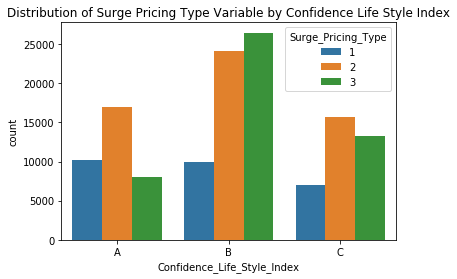

In [30]:
sns.countplot(x=cab_train.Confidence_Life_Style_Index,hue=cab_train.Surge_Pricing_Type)
plt.title("Distribution of Surge Pricing Type Variable by Confidence Life Style Index")

In [31]:
categorical_columns=cab_train.select_dtypes(include='object').columns
categorical_columns

Index(['Trip_ID', 'Type_of_Cab', 'Confidence_Life_Style_Index',
       'Destination_Type', 'Gender'],
      dtype='object')

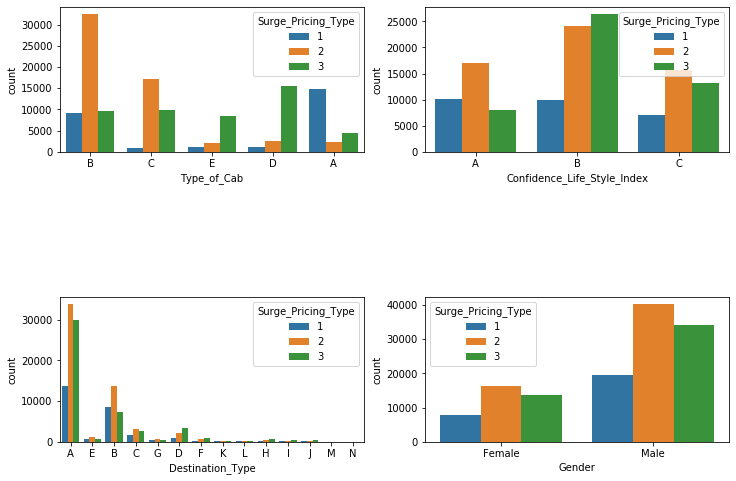

In [32]:
categorical_columns=['Type_of_Cab', 'Confidence_Life_Style_Index',
       'Destination_Type', 'Gender']
fig,axes = plt.subplots(2,2,figsize=(12,8))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=cab_train,hue='Surge_Pricing_Type',ax=axes[row,col])


plt.subplots_adjust(hspace=1)


Text(0.5, 1.0, 'Distribution of Surge Pricing Type Variable by Confidence Life Style Index')

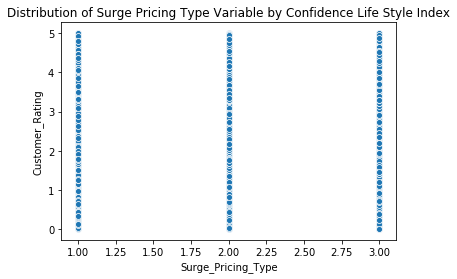

In [33]:
sns.scatterplot(x=cab_train.Surge_Pricing_Type,y=cab_train.Customer_Rating)
plt.title("Distribution of Surge Pricing Type Variable by Confidence Life Style Index")

### Treating Outliers

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

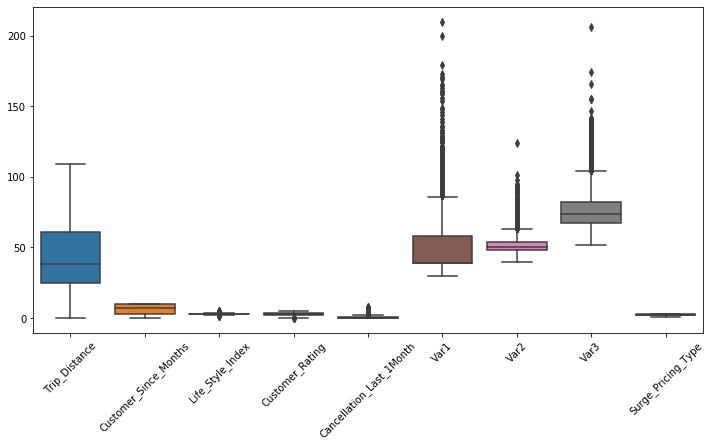

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(data=cab_train)
plt.xticks(rotation=45)

In [35]:
x=cab_train.describe()
x

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.195766,2.787479,2.849458,0.782838,50.606158,51.202800,75.099019,2.155747
std,25.522882,3.639259,0.210567,0.980675,1.037559,19.418227,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.687952,2.152500,0.000000,39.000000,48.000000,67.000000,2.000000
50%,38.200000,7.000000,2.746775,2.895000,0.000000,39.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.912815,3.582500,1.000000,58.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


In [36]:
num_features=cab_train.select_dtypes(include='number').columns
for i in num_features:
    q1=x.loc['25%',i]
    q3=x.loc['75%',i]
    iqr=q3-q1
    uppl=q3+(1.5*iqr)
    lowl=q1-(1.5*iqr)
    cab_train[i]=cab_train[i].apply(lambda x:uppl if x>uppl else x )
    cab_train[i]=cab_train[i].apply(lambda x: lowl if x<lowl else x)

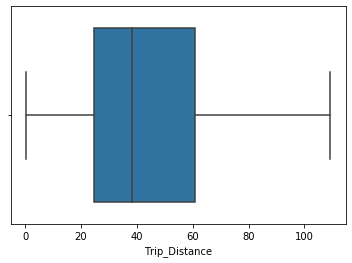

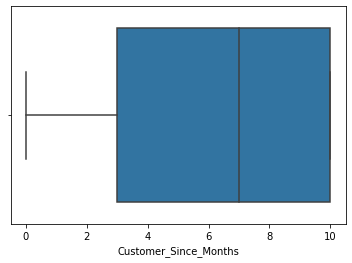

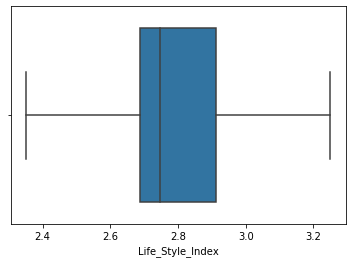

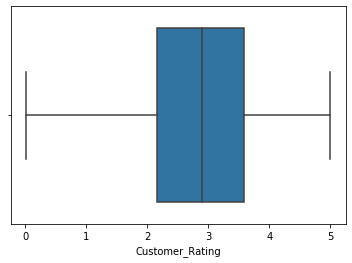

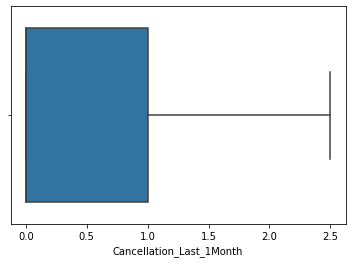

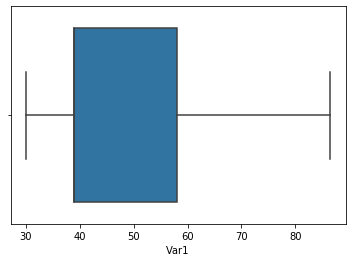

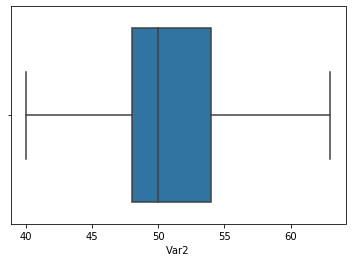

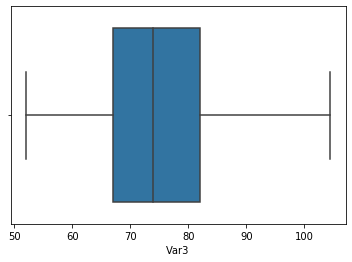

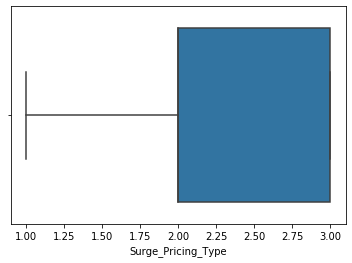

In [37]:
for i in num_features:
    sns.boxplot(cab_train[i])
    plt.show()

### Encoding Categorical Features

In [38]:
cab_train

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0.0,40.0,46.0,60.0,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0.0,38.0,56.0,78.0,Male,2
2,T0005689464,41.58,B,10.0,2.70697,B,E,3.50125,2.0,39.0,56.0,77.0,Male,2
3,T0005689465,61.56,C,10.0,2.70697,B,A,3.45375,0.0,39.0,52.0,74.0,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,2.5,51.0,49.0,102.0,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131657,T0005908509,11.72,D,1.0,2.74229,A,A,3.28500,0.0,61.0,47.0,76.0,Male,3
131658,T0005908510,74.81,C,7.0,2.81059,C,A,0.44500,0.0,39.0,63.0,88.0,Male,2
131659,T0005908512,40.17,C,10.0,2.99565,B,A,3.33625,0.0,39.0,48.0,75.0,Female,2
131660,T0005908513,46.88,B,4.0,3.04744,A,B,4.15750,1.0,47.0,54.0,79.0,Male,2


In [39]:
train1=cab_train.copy()

In [40]:
train1.drop('Trip_ID',axis=1,inplace=True)

In [41]:
test1=cab_test.copy()

In [42]:
df_train_dummy=pd.get_dummies(data=train1,drop_first=True)
df_train_dummy

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0.0,40.0,46.0,60.0,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0.0,38.0,56.0,78.0,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.70697,3.50125,2.0,39.0,56.0,77.0,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.70697,3.45375,0.0,39.0,52.0,74.0,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,2.5,51.0,49.0,102.0,2,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131657,11.72,1.0,2.74229,3.28500,0.0,61.0,47.0,76.0,3,0,...,0,0,0,0,0,0,0,0,0,1
131658,74.81,7.0,2.81059,0.44500,0.0,39.0,63.0,88.0,2,0,...,0,0,0,0,0,0,0,0,0,1
131659,40.17,10.0,2.99565,3.33625,0.0,39.0,48.0,75.0,2,0,...,0,0,0,0,0,0,0,0,0,0
131660,46.88,4.0,3.04744,4.15750,1.0,47.0,54.0,79.0,2,1,...,0,0,0,0,0,0,0,0,0,1


In [43]:
test1.drop('Trip_ID',axis=1,inplace=True)

In [44]:
df_test_dummy=pd.get_dummies(data=test1, drop_first=True)
df_test_dummy

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,9.44,10.0,2.57438,3.68000,2,44.0,46,63,0,0,...,0,0,0,0,0,0,0,0,0,1
1,32.15,10.0,2.85143,1.59375,0,65.0,49,80,1,0,...,0,0,0,0,0,0,0,0,0,0
2,10.38,4.0,2.70530,4.50500,0,44.0,47,74,0,1,...,0,0,0,0,0,0,0,0,0,1
3,14.94,6.0,2.48159,4.53000,0,63.0,43,54,1,0,...,0,0,0,0,0,0,0,0,0,1
4,32.03,7.0,2.81598,4.60125,3,96.0,44,56,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87390,29.43,3.0,2.40720,0.99750,0,74.0,48,72,0,1,...,0,0,0,0,0,0,0,0,0,0
87391,14.83,10.0,2.57009,4.74375,0,109.0,42,60,0,1,...,0,0,0,0,0,0,0,0,0,0
87392,37.86,6.0,3.08227,1.63500,0,44.0,57,77,0,0,...,0,0,0,0,0,0,0,0,0,1
87393,10.63,1.0,2.77137,2.59875,1,107.0,51,77,0,1,...,0,0,0,0,1,0,0,0,0,1


In [73]:
test = df_train_dummy[:6*7*600]

train = df_train_dummy[6*7*600:]

In [75]:
cab_xtrain = train.drop(['Surge_Pricing_Type'],axis=1 )
cab_ytrain = train.Surge_Pricing_Type
cab_xtest = test.drop(['Surge_Pricing_Type'],axis=1 )
cab_ytest = test.Surge_Pricing_Type

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score,roc_curve,auc, accuracy_score, classification_report, confusion_matrix, f1_score, mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [48]:
# defining RMSLE metric (Root mean squared log error)

In [49]:
from sklearn.metrics import mean_squared_log_error
def rmsle(y, yhat):
    return (np.sqrt(mean_squared_log_error(y, yhat)))*1000

def rmsle_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmsle", rmsle(y,yhat)

In [102]:
params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.03,
          "max_depth": 14,
          "subsample": 0.9,
          "colsample_bytree": 0.7,
          "silent": 1,
          "seed": 10
          }
num_boost_round = 1000


dtrain = xgb.DMatrix(cab_xtrain, cab_ytrain)
dvalid = xgb.DMatrix(cab_xtest, cab_ytest)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

In [103]:

from time import time
print("Train a XGBoost model")
start = time()
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, 
  early_stopping_rounds=100, feval=rmsle_xg, verbose_eval=True)
end = time()
print('Training time is {:2f} s.'.format(end-start))

Train a XGBoost model
[0]	train-rmse:1.76696	eval-rmse:1.75772	train-rmsle:1766.97528	eval-rmsle:1757.72440
Multiple eval metrics have been passed: 'eval-rmsle' will be used for early stopping.

Will train until eval-rmsle hasn't improved in 100 rounds.
[1]	train-rmse:1.72098	eval-rmse:1.71197	train-rmsle:1720.98124	eval-rmsle:1711.96950
[2]	train-rmse:1.67651	eval-rmse:1.66843	train-rmsle:1676.51093	eval-rmsle:1668.42556
[3]	train-rmse:1.63324	eval-rmse:1.62583	train-rmsle:1633.24189	eval-rmsle:1625.82922
[4]	train-rmse:1.59148	eval-rmse:1.58462	train-rmsle:1591.47954	eval-rmsle:1584.62107
[5]	train-rmse:1.55045	eval-rmse:1.54430	train-rmsle:1550.44365	eval-rmsle:1544.30163
[6]	train-rmse:1.51150	eval-rmse:1.50623	train-rmsle:1511.49917	eval-rmsle:1506.23190
[7]	train-rmse:1.47328	eval-rmse:1.46894	train-rmsle:1473.28234	eval-rmsle:1468.93740
[8]	train-rmse:1.43632	eval-rmse:1.43295	train-rmsle:1436.32066	eval-rmsle:1432.95038
[9]	train-rmse:1.40107	eval-rmse:1.39863	train-rmsle:1401.

[94]	train-rmse:0.47138	eval-rmse:0.58574	train-rmsle:471.37985	eval-rmsle:585.74057
[95]	train-rmse:0.46985	eval-rmse:0.58510	train-rmsle:469.85310	eval-rmsle:585.09749
[96]	train-rmse:0.46822	eval-rmse:0.58450	train-rmsle:468.21722	eval-rmsle:584.50216
[97]	train-rmse:0.46658	eval-rmse:0.58389	train-rmsle:466.57810	eval-rmsle:583.89217
[98]	train-rmse:0.46508	eval-rmse:0.58341	train-rmsle:465.07636	eval-rmsle:583.40746
[99]	train-rmse:0.46377	eval-rmse:0.58285	train-rmsle:463.77099	eval-rmsle:582.84783
[100]	train-rmse:0.46265	eval-rmse:0.58237	train-rmsle:462.65262	eval-rmsle:582.36939
[101]	train-rmse:0.46114	eval-rmse:0.58191	train-rmsle:461.14090	eval-rmsle:581.91317
[102]	train-rmse:0.45962	eval-rmse:0.58151	train-rmsle:459.61896	eval-rmsle:581.50989
[103]	train-rmse:0.45826	eval-rmse:0.58115	train-rmsle:458.25663	eval-rmsle:581.14839
[104]	train-rmse:0.45708	eval-rmse:0.58069	train-rmsle:457.07959	eval-rmsle:580.69056
[105]	train-rmse:0.45605	eval-rmse:0.58035	train-rmsle:456.0

[190]	train-rmse:0.39244	eval-rmse:0.57125	train-rmsle:392.43939	eval-rmsle:571.24823
[191]	train-rmse:0.39186	eval-rmse:0.57125	train-rmsle:391.85807	eval-rmsle:571.24585
[192]	train-rmse:0.39129	eval-rmse:0.57121	train-rmsle:391.29090	eval-rmsle:571.21384
[193]	train-rmse:0.39070	eval-rmse:0.57120	train-rmsle:390.69739	eval-rmsle:571.19846
[194]	train-rmse:0.39004	eval-rmse:0.57113	train-rmsle:390.03903	eval-rmsle:571.12855
[195]	train-rmse:0.38946	eval-rmse:0.57111	train-rmsle:389.45785	eval-rmsle:571.11329
[196]	train-rmse:0.38912	eval-rmse:0.57110	train-rmsle:389.11894	eval-rmsle:571.10006
[197]	train-rmse:0.38874	eval-rmse:0.57108	train-rmsle:388.73926	eval-rmsle:571.08420
[198]	train-rmse:0.38813	eval-rmse:0.57102	train-rmsle:388.13120	eval-rmsle:571.01643
[199]	train-rmse:0.38765	eval-rmse:0.57101	train-rmsle:387.64664	eval-rmsle:571.01023
[200]	train-rmse:0.38735	eval-rmse:0.57099	train-rmsle:387.35235	eval-rmsle:570.99056
[201]	train-rmse:0.38698	eval-rmse:0.57094	train-rmsle

[286]	train-rmse:0.35427	eval-rmse:0.57112	train-rmsle:354.26864	eval-rmsle:571.12056
[287]	train-rmse:0.35384	eval-rmse:0.57110	train-rmsle:353.83812	eval-rmsle:571.09839
[288]	train-rmse:0.35353	eval-rmse:0.57108	train-rmsle:353.52644	eval-rmsle:571.08510
[289]	train-rmse:0.35336	eval-rmse:0.57107	train-rmsle:353.36000	eval-rmsle:571.07109
[290]	train-rmse:0.35294	eval-rmse:0.57112	train-rmsle:352.93877	eval-rmsle:571.11788
[291]	train-rmse:0.35252	eval-rmse:0.57110	train-rmsle:352.51597	eval-rmsle:571.09898
[292]	train-rmse:0.35222	eval-rmse:0.57111	train-rmsle:352.21615	eval-rmsle:571.11096
[293]	train-rmse:0.35188	eval-rmse:0.57113	train-rmsle:351.88290	eval-rmsle:571.12777
[294]	train-rmse:0.35158	eval-rmse:0.57114	train-rmsle:351.57508	eval-rmsle:571.14142
[295]	train-rmse:0.35109	eval-rmse:0.57115	train-rmsle:351.08709	eval-rmsle:571.15024
[296]	train-rmse:0.35078	eval-rmse:0.57115	train-rmsle:350.78263	eval-rmsle:571.14953
[297]	train-rmse:0.35052	eval-rmse:0.57115	train-rmsle

In [104]:
print("validating")
#cab_xtest.sort_index(inplace=True) 
#cab_ytest.sort_index(inplace=True) 
yhat =np.round( gbm.predict(xgb.DMatrix(cab_xtest)))
yhat

validating


array([2., 2., 2., ..., 2., 3., 3.], dtype=float32)

In [105]:
pd.DataFrame({'actual':cab_ytest,'predicted':yhat})

,actual,predicted
0,2,2.0
1,2,2.0
2,2,2.0
3,3,2.0
4,2,2.0
...,...,...
25195,1,2.0
25196,2,2.0
25197,2,2.0
25198,3,3.0


In [107]:
accuracy_score = accuracy_score(cab_ytest, yhat)
accuracy_score

0.6404761904761904

In [116]:
print("Make predictions on the test set")

dtest = xgb.DMatrix(df_test_dummy)
test_probs = np.round(gbm.predict(dtest))
test_probs
# model1  kaggle private score 0.12647
result = pd.DataFrame({"Trip_ID": cab_test['Trip_ID'], 'Surge_Price_Type': test_probs})

Make predictions on the test set


In [117]:
result

,Trip_ID,Surge_Price_Type
0,T0005689459,2.0
1,T0005689462,2.0
2,T0005689463,2.0
3,T0005689466,2.0
4,T0005689468,2.0
...,...,...
87390,T0005908503,2.0
87391,T0005908504,2.0
87392,T0005908505,2.0
87393,T0005908511,2.0


In [119]:
#Saving the data to an csv file
result.to_csv(r'C:\Users\Dell\Desktop\Python Course\Hackathon\Hackathon3\Submission.csv', index=False) 